In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 制作数据
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100, 1)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100, 1)

In [3]:
n_data.size(), x0.size(), y0.size(), x1.size(), y1.size()

(torch.Size([100, 2]),
 torch.Size([100, 2]),
 torch.Size([100, 1]),
 torch.Size([100, 2]),
 torch.Size([100, 1]))

In [4]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)

In [5]:
x.shape, y.shape

(torch.Size([200, 2]), torch.Size([200, 1]))

In [6]:
x.data.numpy()[:, 0][:5], x.data.numpy()[:, 1][:5]

(array([0.4168843 , 1.9259739 , 2.560935  , 0.48428535, 2.7628512 ],
       dtype=float32),
 array([0.45164013, 0.8468677 , 4.3923445 , 3.138462  , 1.8164177 ],
       dtype=float32))

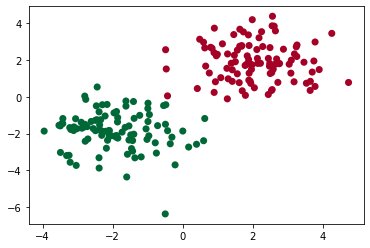

In [7]:
plt.scatter(
    x.data.numpy()[:, 0], 
    x.data.numpy()[:, 1], 
    c = y.data.numpy(), s = 50, lw = 0, cmap = 'RdYlGn')
plt.show()

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [9]:
logistic_model = LogisticRegression()

In [10]:
if torch.cuda.is_available():
    logistic_model.cuda()

In [11]:
# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr = 1e-3, momentum = 0.9)

In [12]:
# Variable() 可以计算梯度
x_data1 = Variable(x)
x_data1[:5], x[:5]

(tensor([[0.4169, 0.4516],
         [1.9260, 0.8469],
         [2.5609, 4.3923],
         [0.4843, 3.1385],
         [2.7629, 1.8164]]),
 tensor([[0.4169, 0.4516],
         [1.9260, 0.8469],
         [2.5609, 4.3923],
         [0.4843, 3.1385],
         [2.7629, 1.8164]]))

In [15]:
y_data1 = Variable(y).cuda()
x_data1 = Variable(x).cuda()
out1 = logistic_model(x_data1)
y_data1.size(), out1.size()

(torch.Size([200, 1]), torch.Size([200, 1]))

In [18]:
# 开始训练
for epoch in range(10000):
    if torch.cuda.is_available():
        x_data = Variable(x).cuda()
        y_data = Variable(y).cuda()
    else:
        x_data = Variable(x)
        y_data = Variable(y)
    out = logistic_model(x_data)
    loss = criterion(out, y_data)
    print_loss = loss.data.item()
    # 逐元素比较 a 和 b，即是否 a >= b
    mask = out.ge(0.5).float()  # 返回 0, 1
    correct = (mask == y_data).sum()  # 计算正确预测的个数
    acc = correct.item() / x_data.size(0)  # 计算精度
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 2000 == 0:
        print('*' * 20)
        print(f"epoch: {epoch + 1}")
        print(f"loss is: {print_loss}")
        print(f"acc is: {acc}")

********************
epoch: 2000
loss is: 0.009771211072802544
acc is: 0.995
********************
epoch: 4000
loss is: 0.009508704766631126
acc is: 0.995
********************
epoch: 6000
loss is: 0.009273163974285126
acc is: 0.995
********************
epoch: 8000
loss is: 0.009059625677764416
acc is: 0.995
********************
epoch: 10000
loss is: 0.008864411152899265
acc is: 0.995


In [19]:
logistic_model.linear.weight

Parameter containing:
tensor([[-2.2778, -2.9796]], device='cuda:0', requires_grad=True)

In [22]:
# 结果可视化
wo, w1 = logistic_model.linear.weight[0]
b = logistic_model.linear.bias
wo, w1, b

(tensor(-2.2778, device='cuda:0', grad_fn=<UnbindBackward>),
 tensor(-2.9796, device='cuda:0', grad_fn=<UnbindBackward>),
 Parameter containing:
 tensor([-0.4183], device='cuda:0', requires_grad=True))

In [23]:
wo = float(wo.item())
w1 = float(w1.item())
b = float(b.item())

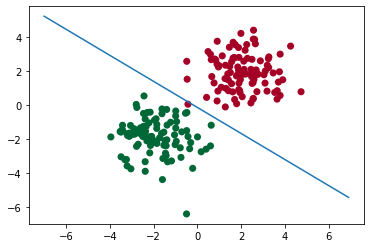

In [25]:
plot_x = np.arange(-7, 7, 0.1)
plot_y = (- wo * plot_x - b) / w1
plt.scatter(
    x.data.numpy()[:, 0], 
    x.data.numpy()[:, 1], 
    c = y.data.numpy(), s = 50, lw = 0, cmap = 'RdYlGn')
plt.plot(plot_x, plot_y)
plt.show()